![](images/TCIhome.jpg)

# Open Data ed emergenze

Lo scopo di questo laboratorio è capire come i dati ci possano aiutare sia durante le emergenze, che per prevenirle o gestirle.

## Open Data

Quando si parla di _open data_, si intende l'unione di:
* dati
* licenze

### Dati

Ogni informazione è fondamentalmente un _dato_. Quando si parla di _open data_, si parla solitamente di dati numerici o descrittivi, che abbiano valore di per sè. Il testo di un libro è un dato, come lo sono i pixel di un'immagine e le immagini di un film. Questi dati però, essendo _opere_, hanno normalmente delle licenze specifiche.

### Open Source

Uno dei primi modelli che hanno portato a pensare che la conoscenza dovesse essere libera è il mondo del _software_, in particolare quello degli _algoritmi_.

Un codice, un programma, infatti, è la trascrizione pratica di un algoritmo.

Negli anni '70, con la comparsa dei primi linguaggi di programmazione ad alto livello e di computer più potenti, si è acceso il dibattito sui diritti di accesso al software.

Uno dei primi a sollevare il problema e a creare una _licenza aperta_, la GPL, è stato [Richard Stallman](https://it.wikipedia.org/wiki/Richard_Stallman).

La filosofia alla base dell'_open source_ è che la conoscenza degli algoritmi, di _come_ fare le cose, dev'essere un patrimonio di tutti e che tutti devono contribuire a migliorare.

Notare che _open source_ non significa necessariamente gratis.

### Open Data

In linea con la filosofia _open source_, si è sviluppato il movimento _open data_, che propone di creare delle licenze libere, dette anche _copyleft_ (in alternativa al _copyright_), che permettano la circolazione e il riuso, controllato, dei dati.

Uno degli ambiti che ha richiesto più fortemente questo passaggio è quello dei _dati pubblici_, o comunque _pagati con denaro pubblico_. Fatto salvo per quelle che sono coperte da privacy, si pensa che sia diritto di tutti utilizzare queste informazioni.

#### Le licenze Open Data

La [Open Definition](https://licenses.opendefinition.org/) della _Open Knowledge Foundation_ (OKFN) dice

> "A piece of content or data is open if anyone is free to use, reuse, and redistribute it — subject only, at most, to the requirement to attribute and share-alike."

## Percorso: i dati per emergenza li guardiamo

* per _prevenire_ le emergenze
* per _supportare_ le emergenze

### Quando si parla di _prevenire_, dobbiamo:
* conoscere
* progettare e programmare

#### Per _conoscere_
* sappiamo quali sono le _criticità_ del nostro territorio?
* sappiamo quali sono le possibilità del nostro territorio?

## Per _supportare_

* raccogliere informazioni durante l'emergenza
* farle circolare
* [HOT](www.hotosm.org) (vedere i progetti esistenti e vedere il tileserver)

## Fonti disponibili per _conoscere_

Tutto si basa su _criticità_ e _rischio_

* le informazioni sulla _criticità idraulica_ e _sismica_ che non sempre sono open e facili da usare come dati
* le informazioni sui luoghi a rischio industriale (in questo caso, ARPA, tabula, mappa)


# TerremotoCentroItalia

Esperienza di gestione dell'emergenza.

* [Il sito principale](www.terremotocentroitalia.info)
* [Il sito su github](https://github.com/emergenzeHack/terremotocentro)
* [Issue su github](https://github.com/emergenzeHack/terremotocentro_segnalazioni/issues)


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import yaml
import re

In [3]:
# leggiamo i dati di TCI

dTCI=pd.read_json('download/TCI/issues_2018-04-11.json.xz',lines=True)

In [4]:
# guardiamo le prime righe
dTCI.head()

,assignee,assignees,author_association,body,closed_at,closed_by,comments,comments_url,created_at,events,...,labels_url,locked,milestone,number,repository_url,state,title,updated_at,url,user
0,None,[],MEMBER,<pre><yamldata>tel: '3398586465'\r\nemail: gia...,NaT,None,[],https://api.github.com/repos/emergenzeHack/ter...,2018-04-05 08:00:23,"[{'commit_id': None, 'commit_url': None, 'url'...",...,https://api.github.com/repos/emergenzeHack/ter...,False,None,3472,https://api.github.com/repos/emergenzeHack/ter...,open,Cercasi a #Norcia modulo-container da usare co...,2018-04-05 10:05:42,https://api.github.com/repos/emergenzeHack/ter...,{'following_url': 'https://api.github.com/user...
1,None,[],MEMBER,<pre><yamldata>titolo_evento: 'In cammino nell...,NaT,None,[],https://api.github.com/repos/emergenzeHack/ter...,2018-03-21 18:24:18,"[{'commit_id': None, 'commit_url': None, 'url'...",...,https://api.github.com/repos/emergenzeHack/ter...,False,None,3471,https://api.github.com/repos/emergenzeHack/ter...,open,Presentazione del reportage di viaggio 'In cam...,2018-03-21 18:26:15,https://api.github.com/repos/emergenzeHack/ter...,{'following_url': 'https://api.github.com/user...
2,None,[],MEMBER,<pre><yamldata>tel: ''\nemail: ''\ncosa: 'RICE...,NaT,None,[],https://api.github.com/repos/emergenzeHack/ter...,2018-03-21 18:17:27,"[{'commit_id': None, 'commit_url': None, 'url'...",...,https://api.github.com/repos/emergenzeHack/ter...,False,None,3470,https://api.github.com/repos/emergenzeHack/ter...,open,Cercasi IMPIANTO AUDIO E OGGETTI DI ARREDO per...,2018-03-22 19:40:47,https://api.github.com/repos/emergenzeHack/ter...,{'following_url': 'https://api.github.com/user...
3,None,[],MEMBER,<pre><yamldata>titolo: 'Presentazione schede A...,NaT,None,[],https://api.github.com/repos/emergenzeHack/ter...,2018-03-16 11:09:36,"[{'commit_id': None, 'commit_url': None, 'url'...",...,https://api.github.com/repos/emergenzeHack/ter...,False,None,3469,https://api.github.com/repos/emergenzeHack/ter...,open,Presentazione schede Aedes: scadenza 31 marzo ...,2018-03-16 11:09:56,https://api.github.com/repos/emergenzeHack/ter...,{'following_url': 'https://api.github.com/user...
4,None,[],MEMBER,<pre><yamldata>titolo: 'Comune di #Tolentino: ...,NaT,None,[],https://api.github.com/repos/emergenzeHack/ter...,2018-03-16 11:03:50,"[{'commit_id': None, 'commit_url': None, 'url'...",...,https://api.github.com/repos/emergenzeHack/ter...,False,None,3468,https://api.github.com/repos/emergenzeHack/ter...,open,Comune di #Tolentino: dove collocare temporane...,2018-03-16 11:10:17,https://api.github.com/repos/emergenzeHack/ter...,{'following_url': 'https://api.github.com/user...


In [5]:
# Le issue che ci interessano sono solo quelle che sono state accettate.

# Le label sono in un vettore

# Creiamo una colonna che contenga la lista delle label per ogni issue
dTCI['labelList']=pd.Series(map(lambda x: ",".join([l['name'] for l in x]), dTCI['labels']))

dTCI['labelList'].head()

0                 Accettato,Bollettino,Fabbisogni,Form
1                 Accettato,Bollettino,Eventi,Facebook
2             Accettato,Bollettino,Fabbisogni,Facebook
3    Accettato,Bollettino,Form,Notizie Utili,Ricost...
4    Accettato,Bollettino,Notizie Utili,Ricostruzio...
Name: labelList, dtype: object

In [6]:
# Quante sono quelle accettate rispetto al totale?

dTCI['labelList'].str.contains('Accettato').value_counts()

True     2657
False     815
Name: labelList, dtype: int64

In [7]:
# La colonna events ha un formato ancora elaborabile

dTCI['events'].head()

0    [{'commit_id': None, 'commit_url': None, 'url'...
1    [{'commit_id': None, 'commit_url': None, 'url'...
2    [{'commit_id': None, 'commit_url': None, 'url'...
3    [{'commit_id': None, 'commit_url': None, 'url'...
4    [{'commit_id': None, 'commit_url': None, 'url'...
Name: events, dtype: object

In [8]:
dTCI['events']=pd.Series(map(pd.DataFrame,dTCI['events']))

In [9]:
# esempio di eventi del primo valore in memoria
dTCI.iloc[2]['events']

,actor,commit_id,commit_url,created_at,event,id,issue,label,rename,url
0,{'following_url': 'https://api.github.com/user...,None,None,2018-03-21T18:17:27Z,labeled,1533920228,{'labels': [{'url': 'https://api.github.com/re...,"{'color': 'd93f0b', 'name': 'Fabbisogni'}",NaN,https://api.github.com/repos/emergenzeHack/ter...
1,{'following_url': 'https://api.github.com/user...,None,None,2018-03-21T18:17:27Z,labeled,1533920229,{'labels': [{'url': 'https://api.github.com/re...,"{'color': 'c5def5', 'name': 'Form'}",NaN,https://api.github.com/repos/emergenzeHack/ter...
2,{'following_url': 'https://api.github.com/user...,None,None,2018-03-21T18:26:53Z,labeled,1533941022,{'labels': [{'url': 'https://api.github.com/re...,"{'color': 'fef2c0', 'name': 'Accettato'}",NaN,https://api.github.com/repos/emergenzeHack/ter...
3,{'following_url': 'https://api.github.com/user...,None,None,2018-03-21T18:26:53Z,labeled,1533941025,{'labels': [{'url': 'https://api.github.com/re...,"{'color': 'c2e0c6', 'name': 'Bollettino'}",NaN,https://api.github.com/repos/emergenzeHack/ter...
4,{'following_url': 'https://api.github.com/user...,None,None,2018-03-21T18:26:53Z,labeled,1533941028,{'labels': [{'url': 'https://api.github.com/re...,"{'color': '5319e7', 'name': 'Facebook'}",NaN,https://api.github.com/repos/emergenzeHack/ter...
5,{'following_url': 'https://api.github.com/user...,None,None,2018-03-21T18:26:53Z,unlabeled,1533941031,{'labels': [{'url': 'https://api.github.com/re...,"{'color': 'c5def5', 'name': 'Form'}",NaN,https://api.github.com/repos/emergenzeHack/ter...
6,{'following_url': 'https://api.github.com/user...,None,None,2018-03-21T18:28:00Z,renamed,1533943442,{'labels': [{'url': 'https://api.github.com/re...,NaN,{'to': 'Cercasi IMPIANTO E OGGETTI per spazio ...,https://api.github.com/repos/emergenzeHack/ter...
7,{'following_url': 'https://api.github.com/user...,None,None,2018-03-22T19:40:47Z,renamed,1536442737,{'labels': [{'url': 'https://api.github.com/re...,NaN,{'to': 'Cercasi IMPIANTO AUDIO E OGGETTI DI AR...,https://api.github.com/repos/emergenzeHack/ter...


In [10]:
# Riusciamo a sapere quanto tempo è passato dalla creazione di un issue al label "accettato"?

for index, issue in dTCI.iterrows():
    for ie,e in issue['events'].iterrows():
        try:
            if (not pd.isna(e['label'])):
                if (e['label']['name']) == 'Accettato':
                    issue['dataAccettato'] = e['created_at']
                    dTCI.loc[index,'dataAccettato']=e['created_at']
                    break
        except:
            dTCI.loc[index,'dataAccettato']=None
            
dTCI['dataAccettato']=pd.to_datetime(dTCI['dataAccettato'])

In [11]:
tempoAccettato=(dTCI['dataAccettato']-dTCI['created_at'])/pd.Timedelta(seconds=1)
tempoAccettato.head()

0     34.0
1     35.0
2    566.0
3     19.0
4     38.0
dtype: float64

In [12]:
tempoAccettato.describe()

count    2.736000e+03
mean     2.414655e+04
std      1.127390e+05
min      0.000000e+00
25%      8.800000e+01
50%      9.755000e+02
75%      8.614750e+03
max      2.109750e+06
dtype: float64

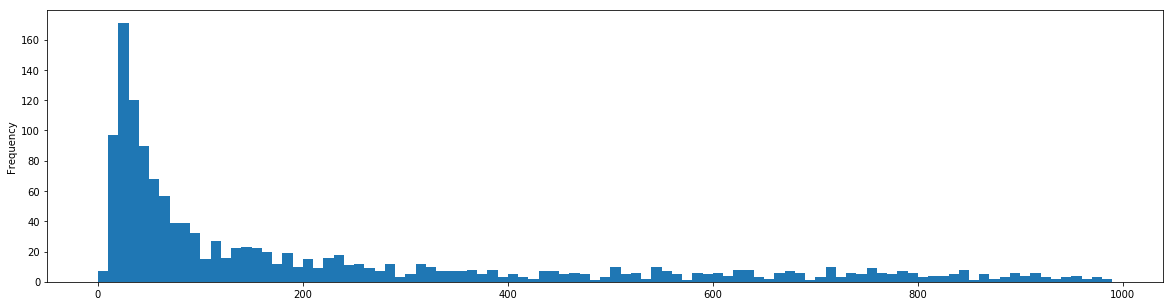

In [13]:
# Plottiamo un istogramma con il tempo necessario per accettare

tempoAccettato.plot.hist(bins=range(0,1000,10),figsize=(20,5))

In [14]:
# Conserviamo solo le issue che sono state accettate

dTCI=dTCI[dTCI['labelList'].str.contains('Accettato')]

In [15]:
# Anche la colonna body contiene dei valori ulteriori, codificati in formato YAML

dTCI.iloc[0]['body']

"<pre><yamldata>tel: '3398586465'\r\nemail: giacocariani@gmail.com\r\ncosa: 'Modulo container che sarà usato come sala d''attesa medica #Norcia'\r\ndescrizione: 'Il Comune di Norcia ha ricevuto come donazione dalla Croce Rossa Italiana un modulo-container da utilizzare come ambulatorio medico per il nuovo medico di medicina generale che avrebbe svolto la sua attività a Norcia vista la grave situazione post sima 2016. È sorto però il problema di avere un container da utilizzare come sala d''attesa per i pazienti in attesa di entrare nell''ambulatorio-container già donato dalla Croce Rossa Italiana. Si richiede nei limiti del possibile se ci fosse la disponibilità di un container da utilizzare come sala d''attesa. Grazie!'\r\nindirizzo: 'Piazza San Benedetto, Casale Carucci, Norcia, Perugia, Umbria, 06046, Italia'\r\nlat: '42.7927706'\r\nlon: '13.0930812'\r\nlink: ''\r\nimmagine: ''\r\ndata: 05/04/2018\r\n</yamldata></pre>"

In [16]:
# con una _regular expression_ possiamo estrarre tutto cio' che sta fra <yamldata> e </yamldata>

dTCI['bodyYAML']=dTCI['body'].str.extract('<yamldata>(.*)</yamldata>',flags=re.DOTALL,expand=True)

dTCI['bodyYAML'].head()

0    tel: '3398586465'\r\nemail: giacocariani@gmail...
1    titolo_evento: 'In cammino nelle Terre Mutate'...
2    tel: ''\nemail: ''\ncosa: 'RICERCA IMPIANTO E ...
3    titolo: 'Presentazione schede Aedes: scadenza ...
4    titolo: 'Comune di #Tolentino: dove collocare ...
Name: bodyYAML, dtype: object

In [17]:
# Utilizzando pyYAML, possiamo decodificare questi valori

pd.DataFrame([yaml.load(dTCI.iloc[0]['bodyYAML'])])

,cosa,data,descrizione,email,immagine,indirizzo,lat,link,lon,tel
0,Modulo container che sarà usato come sala d'at...,05/04/2018,Il Comune di Norcia ha ricevuto come donazione...,giacocariani@gmail.com,,"Piazza San Benedetto, Casale Carucci, Norcia, ...",42.7927706,,13.0930812,3398586465


In [18]:
# Usiamo una funzione di decodifica, per evitare di avere errori se lo YAML fosse malformato

def decodeYAMLBody(b):
    try:
        return pd.DataFrame([yaml.load(b)])
    except:
        return pd.DataFrame([{}])
    
bodyData=pd.concat(pd.Series(map(decodeYAMLBody,dTCI['bodyYAML'])).tolist(),axis=0)

# Abbiamo creato un dataframe: gli assegniamo un indice per avere la possibilita' di unirli
bodyData.index=dTCI.index

# Guardiamo il contenuto
bodyData.head()

,E-mail,Nome,Telegram_user,Testo,URL,accesso,bic,causale,chi,cosa,...,nom,nome,notastrada,ora_evento,postale,promotore,tel,telegram_user,titolo,titolo_evento
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Modulo container che sarà usato come sala d'at...,...,NaN,NaN,NaN,NaN,NaN,NaN,3398586465,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18:00,NaN,Movimento Tellurico con il supporto di APE Ass...,NaN,NaN,NaN,In cammino nelle Terre Mutate
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RICERCA IMPIANTO E OGGETTI PER SPAZIO SUI SIBI...,...,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presentazione schede Aedes: scadenza 31 marzo ...,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Comune di #Tolentino: dove collocare temporane...,NaN


In [19]:
# e guardiamo le colonne

bodyData.columns


Index(['E-mail', 'Nome', 'Telegram_user', 'Testo', 'URL', 'accesso', 'bic',
       'causale', 'chi', 'cosa', 'data', 'data_evento', 'descrizione', 'email',
       'fonte', 'iban', 'immagine', 'indirizzo', 'intestazione', 'lat',
       'latStrada', 'link', 'lon', 'lonStrada', 'necessita', 'nom', 'nome',
       'notastrada', 'ora_evento', 'postale', 'promotore', 'tel',
       'telegram_user', 'titolo', 'titolo_evento'],
      dtype='object')

In [20]:
dTCI.shape

(2657, 27)

In [21]:
dTCIMerge=pd.concat([dTCI,bodyData],axis=1)

# Il nuovo dataframe ha tante colonne quante sono i valori dei due frame

dTCIMerge.shape

(2657, 62)

In [22]:
# Ora che abbiamo i valori, possiamo per esempio vedere quante segnalazioni sono aperte e quante chiuse

dTCIMerge.columns

Index(['assignee', 'assignees', 'author_association', 'body', 'closed_at',
       'closed_by', 'comments', 'comments_url', 'created_at', 'events',
       'events_url', 'html_url', 'id', 'labels', 'labels_url', 'locked',
       'milestone', 'number', 'repository_url', 'state', 'title', 'updated_at',
       'url', 'user', 'labelList', 'dataAccettato', 'bodyYAML', 'E-mail',
       'Nome', 'Telegram_user', 'Testo', 'URL', 'accesso', 'bic', 'causale',
       'chi', 'cosa', 'data', 'data_evento', 'descrizione', 'email', 'fonte',
       'iban', 'immagine', 'indirizzo', 'intestazione', 'lat', 'latStrada',
       'link', 'lon', 'lonStrada', 'necessita', 'nom', 'nome', 'notastrada',
       'ora_evento', 'postale', 'promotore', 'tel', 'telegram_user', 'titolo',
       'titolo_evento'],
      dtype='object')

In [23]:
dTCIMerge['state'].value_counts()

open      1954
closed     703
Name: state, dtype: int64

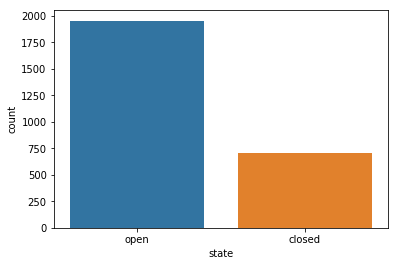

In [24]:
sns.countplot(x='state',data=dTCIMerge)

In [25]:
# Vogliamo vedere quante aperte e quante chiuse per ogni giorno

issueCreated=pd.DataFrame({'countCreated':dTCIMerge.groupby('created_at').size()})
issueClosed=pd.DataFrame({'countClosed':dTCIMerge.groupby('closed_at').size()})


In [27]:
# Qual è stato il giorno con più creazioni di issue?
countCreatedByDay=issueCreated.resample('D').sum()
countClosedByDay=issueClosed.resample('D').sum()

countCreatedByDay.sort_values('countCreated',ascending=False).head()

# proviamo a cambiare 'D' (day) in 'M' (month) o 'W' (week) e vediamo come cambiano i valori e il grafico

,countCreated
created_at,
2017-01-20,135
2017-01-19,134
2016-09-14,132
2016-09-15,106
2016-09-16,76


In [28]:
# Creiamo un unico dataframe

countCreatedClosed=pd.concat([countCreatedByDay,countClosedByDay],axis=1)

In [29]:
countCreatedClosed.head()

,countCreated,countClosed
created_at,,
2016-09-10,1.0,NaN
2016-09-11,0.0,NaN
2016-09-12,0.0,NaN
2016-09-13,70.0,9.0
2016-09-14,132.0,18.0


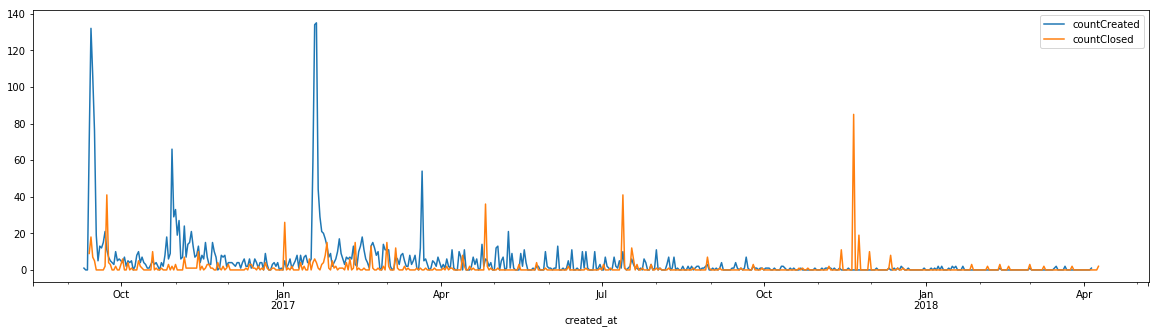

In [30]:
p=countCreatedClosed.plot(figsize=(20,5))


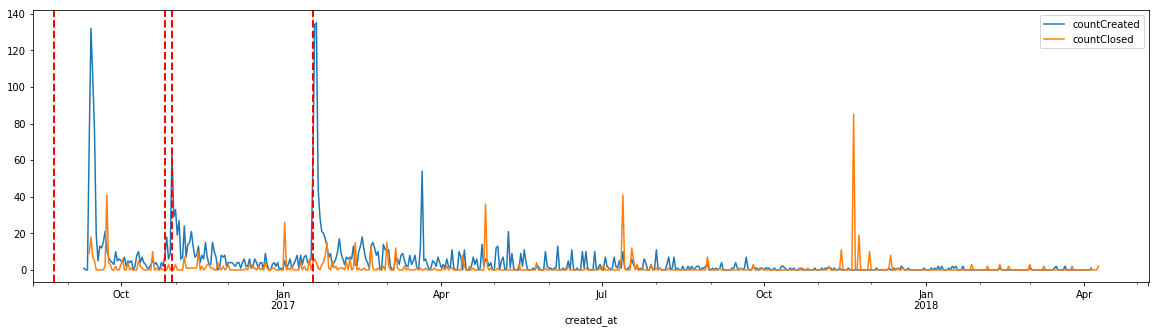

In [31]:
# Cosa sono quei picchi?
# Andiamo a vedere le date dei terremoti: https://it.wikipedia.org/wiki/Terremoto_del_Centro_Italia_del_2016_e_del_2017
p=countCreatedClosed.plot(figsize=(20,5))
p.axvline(x=pd.datetime(2016,8,24),color='r', linestyle='--', lw=2)
p.axvline(x=pd.datetime(2016,10,26),color='r', linestyle='--', lw=2)
p.axvline(x=pd.datetime(2016,10,30),color='r', linestyle='--', lw=2)
p.axvline(x=pd.datetime(2017,1,18),color='r', linestyle='--', lw=2)



In [32]:
# Vogliamo contare le issue con la loro label

labelSet = set.union(*map(set,dTCIMerge['labelList'].str.split(',')))
labelSet

{'Accettato',
 'Acqua',
 'Alloggi',
 'Bambini',
 'Bollettino',
 'Bufale',
 'Cerco lavoro',
 'Cerco un dataset',
 'Cibo',
 'Contatti',
 'Da rilanciare',
 'Donazioni',
 'Eventi',
 'Fabbisogni',
 'Facebook',
 'Form',
 'Non accettato',
 'Notizie Utili',
 'OK',
 'Offro lavoro',
 'Ospitalita animali',
 'Pubblicare su FB',
 'Pubblicare su TW',
 'Raccolte Fondi',
 'Ricostruzione Privata',
 'Ricostruzione Pubblica',
 'Sisma Gennaio 2017',
 'Sisma Ottobre',
 'Telegram',
 'Twitter',
 'Wi-Fi',
 'acquisto solidale',
 'emergenza',
 'emergenzaAbruzzo',
 'nodo001',
 'pubblicare in archive.org',
 'ricostruzione-pubblica',
 'sviluppo-economico'}

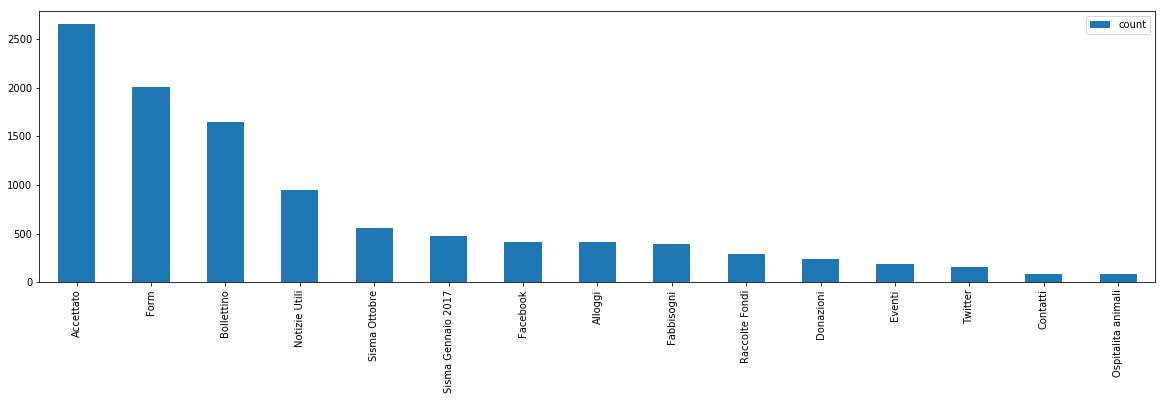

In [33]:
countLabels={}
for label in labelSet:
    countLabels[label]=sum(dTCIMerge['labelList'].str.contains(label))
countLabelsDF=pd.DataFrame({'count':pd.Series(countLabels)})
countLabelsDF.sort_values(by='count',ascending=False).head(15).plot.bar(figsize=(20,5))


# ? Riusciamo a ridurre il plot solo ad alcune label significative?

In [34]:
# Abbiamo notato che alcuni dei dati hanno una latitudine e una longitudine, possiamo plottarli?

dTCIAlloggi=dTCIMerge[dTCIMerge['labelList'].str.contains('alloggi',case=False)]

In [35]:
from ipyleaflet import Map, LayersControl,CircleMarker
from ipywidgets import HTML

mAlloggi = Map(center=[41.47566020027821, 14.809570312500002], zoom=5, crs="EPSG:4326")

for index,row in dTCIAlloggi.iterrows():
    alloggio=CircleMarker(location=(row['lat'],row['lon']))
    html_widget = HTML(
    value="""
        <div>%s</div>""" % (row['descrizione']),
    placeholder='',
    description='',
)
    alloggio.popup=html_widget
    mAlloggi += alloggio

mAlloggi

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [51]:
# ? Riusciamo a visualizzare altri tipi di label modificando HTML ?

In [6]:
# ? Riusciamo a visualizzare l'immagine, se c'è ? 

# Esempio: dati ARPA

* [Qualità dell'aria](https://dati.arpae.it/dataset/qualita-dell-aria-rete-di-monitoraggio)
* [Bollettino meteo](https://dati.arpae.it/dataset/bollettino-testuale-previsioni-meteo)


## Esempio: anagrafe dei siti contaminati

https://dati.arpae.it/dataset/siti-contaminati

purtroppo non hanno latitudine e longitudine

In [38]:
sitiContaminati=pd.read_csv('https://docs.google.com/spreadsheets/d/1I9EGM-j6GrD65GG8ZxosBcFCXABNe0bARnaV4mRB-9I/export?format=csv')

In [39]:
sitiContaminati.head()

,Codice Regionale,Denominazione,Stato,Provincia,Comune,Indirizzo,Località,Soggetto attuatore,Ente responsabile del procedimento,Tipologia sito
0,80330021,PV carburanti ESSO (PBL 105603/PVF 1103). Alseno,Attivata la bonifica,PIACENZA,ALSENO,via Emilia ss9,NaN,ESSO ITALIANA S.R.L.,ARPAE/SAC Piacenza,Altro
1,80330032,Area 21 bis Besenzone,Attivata la bonifica,PIACENZA,BESENZONE,strada comunale di bersano,NaN,ENI S.p.A. Divisione Exploration & Production ...,ARPAE/SAC Piacenza,Area industriale
2,80330033,Aree esterne all'area 1° Centro Olio Besenzone,Attivata la bonifica,PIACENZA,BESENZONE,Via Pavesa,NaN,ENI S.p.A. Divisione Exploration & Production ...,Comune di Besenzone,Area agricola
3,80330034,Aree esterne all'area 21 BIS Besenzone,Attivata la bonifica,PIACENZA,BESENZONE,SP26,CORTE-MAGGIORE - BUSSETTO,ENI S.p.A. Divisione Exploration & Production ...,Comune di Besenzone,Area agricola
4,80330101,Centrale di Caorso,Potenzialmente contaminato,PIACENZA,CAORSO,Via Fermi 5/A,fraz. Zerbio,SOGIN S.p.a.,ARPAE/SAC Piacenza,Area industriale


# Esempio: stabilimenti a rischio di incidente rilevante

* [Stabilimenti a rischio di incidente rilevante](https://dati.arpae.it/dataset/impianti-a-rischio-incidente-rilevante/resource/4f112509-a6f5-4e72-b7cf-79b13583bc6a)

In [40]:
urlRischioIncidente="https://docs.google.com/spreadsheets/d/1UKnysJokTBJvNTa051CaoDyzaBEP3zym-pKmP--XXac/export?format=csv"

sitiRischioIncidente=pd.read_csv(urlRischioIncidente)

sitiRischioIncidente.head()

# hanno lat e lon!

,ID,NOME,INDIRIZZO,COMUNE,PROV,ARTICOLO,NORMATIVA,TIPOLOGIA,COD_MINIST,LON,LAT
0,1,ACOMON s.r.l.,Via Baiona 107,Ravenna,RA,Art 8,D.Lgs. 334/99 e s.m.i.,Stabilimento chimico o petrolchimico,NH051,12.238548,44.450056
1,2,ALMA PETROLI s.p.a.,Via Baiona 195,Ravenna,RA,Art 8,D.Lgs. 334/99 e s.m.i.,Raffineria,NH019,12.258821,44.479247
2,3,ANRIV s.r.l.,Via Monari 5,Ferrara,FE,Art 8,D.Lgs. 334/99 e s.m.i.,Deposito di fitofarmaci,NH024,11.555283,44.865821
3,4,ARCO LOGISTICA s.r.l.,Via Bastianella snc - Area SI.PRO.,Ferrara,FE,Art 8,D.Lgs. 334/99 e s.m.i.,Deposito di fitofarmaci,-,11.585175,44.870779
4,5,ARKEMA s.r.l.,Via Finghé 2,Boretto,RE,Art 6,D.Lgs. 334/99 e s.m.i. e L.R. 26/03 e s.m.i.,Stabilimento chimico o petrolchimico,DH022,10.547611,44.882979


In [41]:
from ipyleaflet import Map, LayersControl,CircleMarker
from ipywidgets import HTML

mRischioIncidente = Map(center=(44.49367139999998,11.3430347), zoom=11, crs="EPSG:4326")

for index,row in sitiRischioIncidente[['NOME','TIPOLOGIA','LON','LAT','INDIRIZZO']].iterrows():
    sito=CircleMarker(location=(row['LAT'],row['LON']))
    html_widget = HTML(
    value="""
        <div>%s
        <ul class='list-group'>
            <li class='list-group-item'>%s</li>
            <li class='list-group-item'>%s</li>
        </ul></div>""" % (row['NOME'],row['INDIRIZZO'],row['TIPOLOGIA']),
    placeholder='',
    description='',
)
    sito.popup=html_widget
    mRischioIncidente += sito

mRischioIncidente

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

## Esempio: copertura dei pronto soccorso di Bologna?

(pare che il plurale sia invariabile, almeno [così ci dice la Crusca](http://www.accademiadellacrusca.it/it/lingua-italiana/consulenza-linguistica/domande-risposte/pronto-soccorso-linguistico))

In [42]:
import osmnx as ox, networkx as nx, geopandas as gpd, matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, Polygon
from descartes import PolygonPatch
ox.config(log_console=True, use_cache=True)

In [50]:
# configure the place, network type, trip times, and travel speed
place = 'Bologna, BO, Emilia-Romagna, Italia'
#place = 'BO, Emilia-Romagna, Italia' # tutta la Provincia, più oneroso computazionalmente
network_type = 'drive'
trip_times = [5, 10, 15, 20] #in minutes
travel_speed = 40 #driving speed in km/hour

In [51]:
# download the street network
G = ox.graph_from_place(place, network_type=network_type)


In [52]:
# find the centermost node and then project the graph to UTM
gdf_nodes = ox.graph_to_gdfs(G, edges=False)
x, y = gdf_nodes['geometry'].unary_union.centroid.xy


## Usiamo una query overpass per trovare i pronto soccorso a Bologna

[Overpass](https://overpass-turbo.eu/) è un motore che permette di fare query sul database di [OpenStreetMap](www.openstreetmap.org).

Sono quelli con amenity=hospital e emergency=yes

In [53]:
import overpy
api = overpy.Overpass()
# Pronto soccorso di Bologna città
result = api.query("""
<osm-script output="json" output-config="" timeout="25">
  <id-query type="area" ref="3600043172" into="a"/>
  <union into="_">
    <query into="_" type="node">
      <has-kv k="amenity" modv="" v="hospital"/>
      <has-kv k="emergency" modv="" v="yes"/>
      <area-query from="a"/>
    </query>
  </union>
  <print e="" from="_" geometry="skeleton" ids="yes" limit="" mode="body" n="" order="id" s="" w=""/>
  <recurse from="_" into="_" type="down"/>
  <print e="" from="_" geometry="skeleton" ids="yes" limit="" mode="skeleton" n="" order="quadtile" s="" w=""/>
</osm-script>
""")
len(result.nodes)



2

In [54]:
if False:
    api = overpy.Overpass()
    # Pronto soccorso di Bologna Provincia
    result = api.query("""
    <osm-script output="json" output-config="" timeout="25">
      <id-query type="area" ref="3600042856" into="a"/>
      <union into="_">
        <query into="_" type="node">
          <has-kv k="amenity" modv="" v="hospital"/>
          <has-kv k="emergency" modv="" v="yes"/>
          <area-query from="a"/>
        </query>
      </union>
      <print e="" from="_" geometry="skeleton" ids="yes" limit="" mode="body" n="" order="id" s="" w=""/>
      <recurse from="_" into="_" type="down"/>
      <print e="" from="_" geometry="skeleton" ids="yes" limit="" mode="skeleton" n="" order="quadtile" s="" w=""/>
    </osm-script>
    """)

len(result.nodes)



2

In [55]:
# Andiamo a cercare i nodi del grafo più vicini ai pronto soccorso

center_nodes=[ox.get_nearest_node(G, (float(node.lat), float(node.lon))) for node in result.nodes]

center_nodes
                                  
G = ox.project_graph(G)

In [57]:
# add an edge attribute for time in minutes required to traverse each edge

# usiamo maxspeed se definito, altrimenti usiamo il valore che avevamo inserito precedentemente
for u, v, k, data in G.edges(data=True, keys=True):
    meters_per_minute = travel_speed * 1000. / 60 #km per hour to m per minute
    if data.get('maxspeed'):
        try:
            meters_per_minute = float(data['maxspeed']) * 1000. / 60
        except:
            pass
    data['time'] = data['length'] / meters_per_minute

In [58]:
# get one color for each isochrone
iso_colors = ox.get_colors(n=len(trip_times), cmap='Reds', start=0.3, alpha=0.1, return_hex=True)

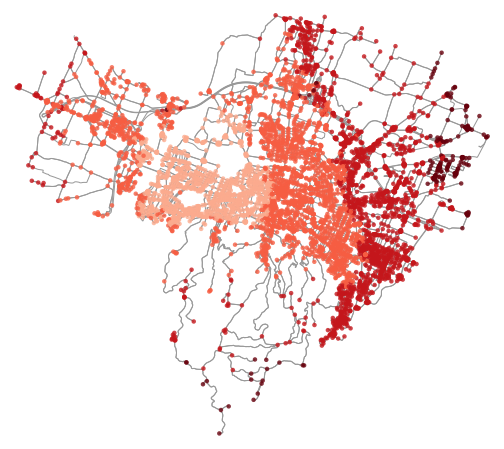

In [59]:
# color the nodes according to isochrone then plot the street network# color 
node_colors = {}
for trip_time, color in zip(sorted(trip_times, reverse=True), reversed(iso_colors)):
    subgraph = nx.ego_graph(G, center_nodes[1], radius=trip_time, distance='time')
    for node in subgraph.nodes():
        node_colors[node] = color
nc = [node_colors[node] if node in node_colors else 'none' for node in G.nodes()]
ns = [20 if node in node_colors else 0 for node in G.nodes()]
fig, ax = ox.plot_graph(G, fig_height=8, node_color=nc, node_size=ns, node_alpha=0.8, node_zorder=2)

In [60]:
def make_iso_polys(G, center_node, edge_buff=25, node_buff=50, infill=False):
    isochrone_polys = []
    for trip_time in sorted(trip_times, reverse=True):
        subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance='time')

        node_points = [Point((data['x'], data['y'])) for node, data in subgraph.nodes(data=True)]
        nodes_gdf = gpd.GeoDataFrame({'id': subgraph.nodes()}, geometry=node_points)
        nodes_gdf = nodes_gdf.set_index('id')

        edge_lines = []
        for n_fr, n_to in subgraph.edges():
            f = nodes_gdf.loc[n_fr].geometry
            t = nodes_gdf.loc[n_to].geometry
            edge_lines.append(LineString([f,t]))

        n = nodes_gdf.buffer(node_buff).geometry
        e = gpd.GeoSeries(edge_lines).buffer(edge_buff).geometry
        all_gs = list(n) + list(e)
        new_iso = gpd.GeoSeries(all_gs).unary_union
        
        # try to fill in surrounded areas so shapes will appear solid and blocks without white space inside them
        if infill:
            new_iso = Polygon(new_iso.exterior)
        isochrone_polys.append(new_iso)
    return isochrone_polys

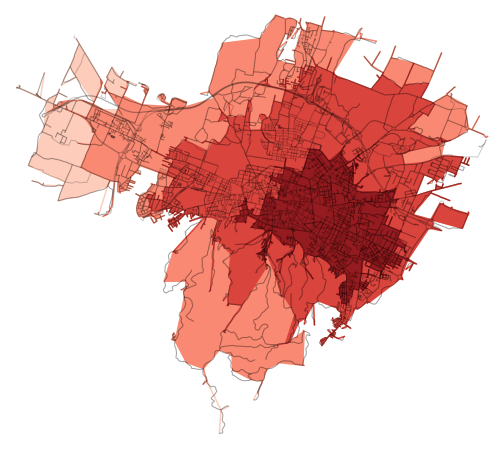

In [61]:
# get one color for each isochrone
iso_colors = ox.get_colors(n=len(trip_times), cmap='Reds', start=0.3, alpha=0.1, return_hex=True)

isochrone_polys = make_iso_polys(G, center_nodes[0], edge_buff=25, node_buff=0, infill=True)
fig, ax = ox.plot_graph(G, fig_height=8, show=False, close=False, edge_color='k', edge_alpha=0.2, node_color='none')
for polygon, fc in zip(isochrone_polys, iso_colors):
    patch = PolygonPatch(polygon, fc=fc, ec='none', alpha=0.6, zorder=-1)
    ax.add_patch(patch)
plt.show()

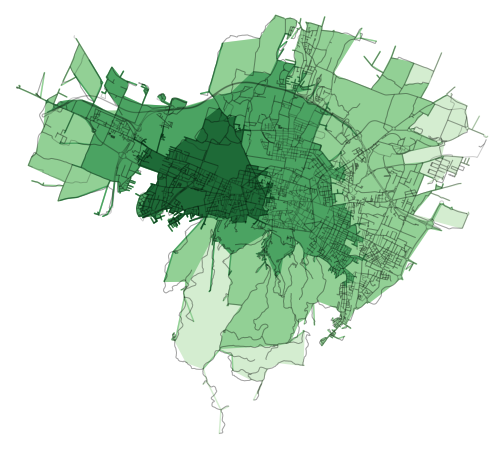

In [62]:
# get one color for each isochrone
iso_colors = ox.get_colors(n=len(trip_times), cmap='Greens', start=0.3, alpha=0.1, return_hex=True)

isochrone_polys = make_iso_polys(G, center_nodes[1], edge_buff=25, node_buff=0, infill=True)
fig, ax = ox.plot_graph(G, fig_height=8, show=False, close=False, edge_color='k', edge_alpha=0.2, node_color='none')
for polygon, fc in zip(isochrone_polys, iso_colors):
    patch = PolygonPatch(polygon, fc=fc, ec='none', alpha=0.6, zorder=-1)
    ax.add_patch(patch)
plt.show()

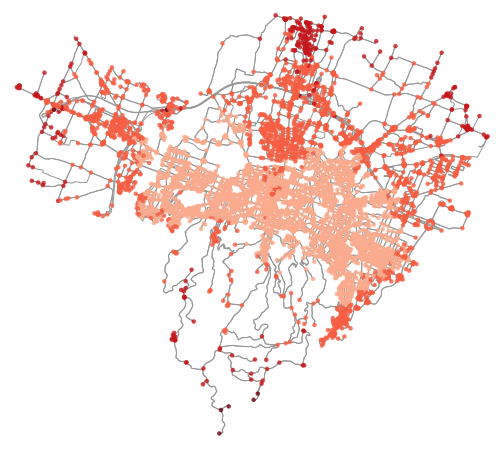

In [63]:
node_time = {}
node_colors = {}
node_center = {}

for center_node in center_nodes:
    iso_colorsR = ox.get_colors(n=len(trip_times), cmap='Reds', start=0.3, alpha=0.1, return_hex=True)
    for trip_time, color in zip(sorted(trip_times, reverse=True), reversed(iso_colorsR)):
        subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance='time')
        for node in subgraph.nodes():
            if node_time.get(node,1000000) > trip_time:
                #print("center 0 %s color %s time %s %s center %s" % (node,color,node_time.get(node,1000000),trip_time,node_center.get(node,"NA")))
                node_time[node] = trip_time
                node_colors[node] = color
                node_center[node]=0
                     
  
nc = [node_colors[node] if node in node_colors else 'none' for node in G.nodes()]
ns = [20 if node in node_colors else 0 for node in G.nodes()]
fig, ax = ox.plot_graph(G, fig_height=8, node_color=nc, node_size=ns, node_alpha=0.8, node_zorder=2)

In [64]:
# Facciamo una copia del grafo per fare degli esperimenti

Gorig=G.copy()

In [71]:
G=Gorig.copy()


## Esperimento: cosa succede se una via è inutilizzabile?

In [65]:
# eliminiamo la via Emilia

edgesViaEmilia=[(u,v,d['name']) for u,v,d in G.edges(data=True) if 'Emilia' in d.get('name',"")]

edgesViaEmilia


[(251885862, 251886380, 'Via Emilia Ponente'),
 (251886380, 1823684002, 'Via Emilia Ponente'),
 (251886381, 1823684002, 'Via Emilia Ponente'),
 (251886381, 1347035086, 'Via Emilia Ponente'),
 (251886383, 1347035086, 'Via Emilia Ponente'),
 (251886383, 1825391434, 'Via Emilia Ponente'),
 (251886386, 252120947, 'Via Emilia Ponente'),
 (251886386, 258984097, 'Via Emilia Ponente'),
 (251886389, 921197999, 'Via Emilia Ponente'),
 (251886389, 251886390, 'Via Emilia Ponente'),
 (251886390, 296320326, 'Via Emilia Ponente'),
 (251886390, 251886389, 'Via Emilia Ponente'),
 (251886391, 296319592, 'Via Emilia Ponente'),
 (251886391, 296319686, 'Via Emilia Ponente'),
 (251886393, 1784608887, 'Via Emilia Ponente'),
 (251886393, 1818421722, 'Via Emilia Ponente'),
 (251886399, 1831560559, 'Via Emilia Ponente'),
 (251886399, 920083614, 'Via Emilia Ponente'),
 (252120947, 251886386, 'Via Emilia Ponente'),
 (254394354, 761247328, 'Via Emilia Levante'),
 (254394354, 4485369298, 'Via Emilia Levante'),
 (25

In [66]:
len(G.edges)

11263

In [67]:
G.remove_edges_from([(u,v) for u,v,d in edgesViaEmilia])
len(G.edges)

11139

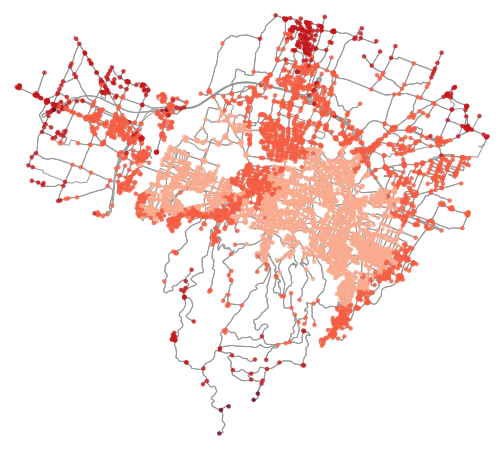

In [68]:

node_time = {}
node_colors = {}
node_center = {}

for center_node in center_nodes:
    iso_colorsR = ox.get_colors(n=len(trip_times), cmap='Reds', start=0.3, alpha=0.1, return_hex=True)
    for trip_time, color in zip(sorted(trip_times, reverse=True), reversed(iso_colorsR)):
        subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance='time')
        for node in subgraph.nodes():
            if node_time.get(node,1000000) > trip_time:
                #print("center 0 %s color %s time %s %s center %s" % (node,color,node_time.get(node,1000000),trip_time,node_center.get(node,"NA")))
                node_time[node] = trip_time
                node_colors[node] = color
                node_center[node]=0
                     
  
nc = [node_colors[node] if node in node_colors else 'none' for node in G.nodes()]
ns = [20 if node in node_colors else 0 for node in G.nodes()]
fig, ax = ox.plot_graph(G, fig_height=8, node_color=nc, node_size=ns, node_alpha=0.8, node_zorder=2)

In [69]:
G=Gorig.copy()

In [70]:
# Eliminiamo il Viale Gozzadini

edgesViale=[(u,v,d['name']) for u,v,d in G.edges(data=True) if 'Giovanni Gozzadini' in d.get('name',"")]

edgesViale

[(82550604, 250763923, 'Viale Giovanni Gozzadini'),
 (250734686, 343039095, 'Viale Giovanni Gozzadini'),
 (250763923, 3752045688, 'Viale Giovanni Gozzadini'),
 (306930310, 2395514799, 'Viale Giovanni Gozzadini'),
 (343039095, 306930310, 'Viale Giovanni Gozzadini'),
 (2395514799, 2395514802, 'Viale Giovanni Gozzadini'),
 (2395514802, 3060843443, 'Viale Giovanni Gozzadini'),
 (2395514802, 2395514799, 'Viale Giovanni Gozzadini'),
 (3060843443, 82550604, 'Viale Giovanni Gozzadini'),
 (3060882668, 2395514802, 'Viale Giovanni Gozzadini'),
 (3752045688, 250734900, 'Viale Giovanni Gozzadini')]

In [71]:
G.remove_edges_from([(u,v) for u,v,d in edgesViale])
len(G.edges)

11252

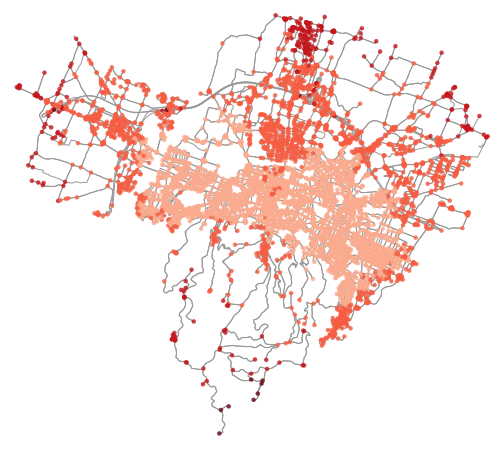

In [72]:

node_time = {}
node_colors = {}
node_center = {}

for center_node in center_nodes:
    iso_colorsR = ox.get_colors(n=len(trip_times), cmap='Reds', start=0.3, alpha=0.1, return_hex=True)
    for trip_time, color in zip(sorted(trip_times, reverse=True), reversed(iso_colorsR)):
        subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance='time')
        for node in subgraph.nodes():
            if node_time.get(node,1000000) > trip_time:
                #print("center 0 %s color %s time %s %s center %s" % (node,color,node_time.get(node,1000000),trip_time,node_center.get(node,"NA")))
                node_time[node] = trip_time
                node_colors[node] = color
                node_center[node]=0
                     
  
nc = [node_colors[node] if node in node_colors else 'none' for node in G.nodes()]
ns = [20 if node in node_colors else 0 for node in G.nodes()]
fig, ax = ox.plot_graph(G, fig_height=8, node_color=nc, node_size=ns, node_alpha=0.8, node_zorder=2)